<a href="https://colab.research.google.com/github/DAN-MASH/Machine_learning_models/blob/main/knre.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Kenya Re-insurance Corporation (KNRA) STOCK ANALYSIS AND PREDICTION USING THE RNN-LSTM

Data source: https://www.wsj.com/market-data/quotes/KE/XNAI/KNRE/financials

In [113]:
#get stock data from the Nairobi Stock Exchange
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import math
import numpy as np
sns.set_style('darkgrid')
plt.style.use('fivethirtyeight')
# plt.style.use('dark_background')
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

In [115]:
url = "/content/drive/MyDrive/Colab Notebooks/knre/HistoricalPrices (2).csv"

In [118]:
data = pd.read_csv(url)

In [ ]:
#read a stock data

print(data.tail())

          Date   Open   High   Low   Close    Volume
1553  06/05/18   2.19   2.21  2.13    2.19     88800
1554  06/04/18   2.14   2.22  2.08    2.14  16617600
1555  05/31/18   2.21   2.25  2.21    2.21    725600
1556  05/30/18   2.23   2.25  2.21    2.23    105600
1557  05/29/18   2.21   2.24  2.21    2.21   8368800


In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1558 entries, 0 to 1557
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     1558 non-null   object 
 1    Open    1558 non-null   float64
 2    High    1558 non-null   float64
 3    Low     1558 non-null   float64
 4    Close   1558 non-null   float64
 5    Volume  1558 non-null   int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 73.2+ KB


In [127]:
data['Date'] = pd.to_datetime(data['Date'])

<ipython-input-127-1a72a8b5b870>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data['Date'] = pd.to_datetime(data['Date'])


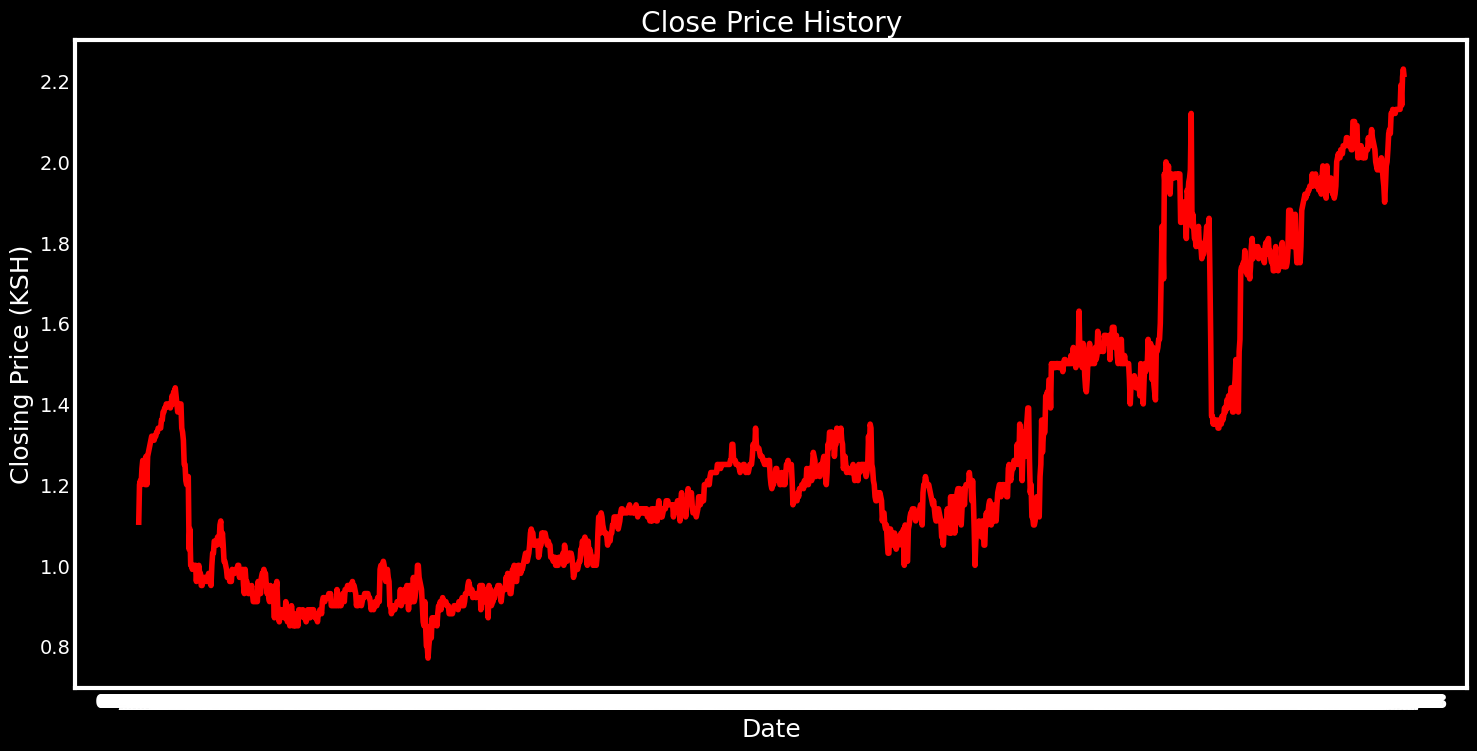

In [120]:
#Close Price History
sns.set_style('darkgrid')
#plt.style.use('dark_background')
plt.style.use('fivethirtyeight')
plt.style.use('dark_background')
plt.figure(figsize = (16,8))
plt.plot(data['Date'],data[' Close'],color = 'red')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price (KSH)',fontsize=18)
plt.title("Close Price History")
plt.grid()
#add a dark background to the chart

plt.show()




In [9]:
data_2019 = data[data['Date'].dt.year== 2019]

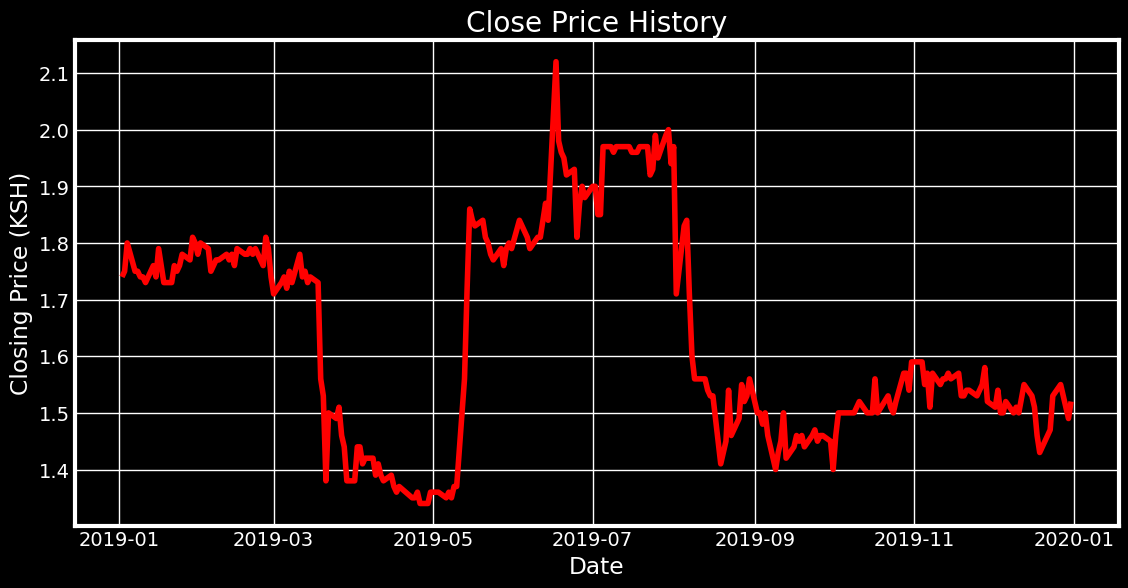

In [22]:
# Plot the filtered data
plt.style.use('dark_background')
plt.figure(figsize = (12,6))
plt.plot(data_2019['Date'], data_2019[' Close'], color='red')
plt.title('Close Price History')
plt.xlabel('Date')
plt.ylabel('Closing Price (KSH)')
#plt.grid()
plt.show()

In [32]:
data.head()

,Date,Open,High,Low,Close,Volume
0,2024-08-26,1.20,1.20,1.08,1.10,961400
1,2024-08-23,1.22,1.22,1.19,1.20,339900
2,2024-08-22,1.24,1.24,1.19,1.21,425100
3,2024-08-21,1.25,1.25,1.20,1.20,358500
4,2024-08-20,1.25,1.25,1.21,1.24,255800


In [34]:
data.shape

(1558, 6)

In [59]:
#create a new dataframe with only the close column
df = data.filter([' Close'])
#convert the dataframe to numpy array
dataset = df.values
#get the number of rows to train the model on
training_data_len = math.ceil(len(dataset)*0.8)


In [60]:
training_data_len

1247

In [65]:
dataset

array([[1.1 ],
       [1.2 ],
       [1.21],
       ...,
       [2.21],
       [2.23],
       [2.21]])

In [63]:
#scale the data by applying preprocessing transformations/normalization
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.2260274 ],
       [0.29452055],
       [0.30136986],
       ...,
       [0.98630137],
       [1.        ],
       [0.98630137]])

In [72]:
#train the data using the last 641 days
#create the training dataset
#create the scaled training dataset
train_data = scaled_data[0:training_data_len, :]
#split the data into x_train and y_train
X_train = []
y_train = []
for i in range(641, len(train_data)):
  X_train.append(train_data[i-241:i,0])
  y_train.append(train_data[i,0])
  if i<=642:
    print(X_train)
    print(y_train)
    print()

[array([0.0890411 , 0.09589041, 0.10958904, 0.10958904, 0.10958904,
       0.12328767, 0.13013699, 0.12328767, 0.11643836, 0.10958904,
       0.11643836, 0.10273973, 0.10958904, 0.10958904, 0.10958904,
       0.10273973, 0.10958904, 0.10958904, 0.10958904, 0.10958904,
       0.12328767, 0.08219178, 0.12328767, 0.12328767, 0.09589041,
       0.09589041, 0.09589041, 0.09589041, 0.11643836, 0.0890411 ,
       0.06849315, 0.12328767, 0.11643836, 0.11643836, 0.0890411 ,
       0.09589041, 0.09589041, 0.10273973, 0.10273973, 0.10958904,
       0.11643836, 0.11643836, 0.12328767, 0.11643836, 0.12328767,
       0.11643836, 0.09589041, 0.10958904, 0.11643836, 0.11643836,
       0.11643836, 0.11643836, 0.1369863 , 0.12328767, 0.14383562,
       0.13013699, 0.12328767, 0.10958904, 0.10958904, 0.12328767,
       0.15068493, 0.13013699, 0.15753425, 0.14383562, 0.13013699,
       0.13013699, 0.15068493, 0.15753425, 0.15753425, 0.15068493,
       0.14383562, 0.15068493, 0.15068493, 0.15753425, 0.1643

In [73]:
#convert the X_train and y_train to numpy array
X_train, y_train = np.array(X_train), np.array(y_train)

In [75]:
X_train.shape

(606, 241)

In [76]:
#reshape the data into 3D: samples,time steps, features
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))
X_train.shape

(606, 241, 1)

# This code defines a sequential model for a Long Short-Term Memory (LSTM) neural network.

# 1. `model = Sequential()`: This line creates an instance of a sequential model.
#    Sequential models are linear stacks of layers.

# 2. `model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))`: This adds the first LSTM layer.
#    - `LSTM(50)`: This specifies that the LSTM layer has 50 memory cells.
#    - `return_sequences=True`: This indicates that the layer should return the full sequence of outputs, not just the last output. This is important for stacking LSTM layers.
#    - `input_shape=(X_train.shape[1],1)`: This defines the shape of the input data.
#      - `X_train.shape[1]` is the number of time steps in your input data (the length of the sequence).
#      - `1` indicates that there is one feature (in this case, the closing price).

# 3. `model.add(LSTM(50, return_sequences=False))`: This adds a second LSTM layer.
#    - `return_sequences=False`: This means that this layer will only return the last output in the sequence.

# 4. `model.add(Dense(25))`: This adds a dense layer with 25 neurons. Dense layers connect every neuron in the previous layer to every neuron in the current layer.

# 5. `model.add(Dense(1))`: This adds the final output layer with one neuron. This neuron will predict the closing price.

In [78]:
#build the lstm model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [79]:
#compile te model
model.compile(optimizer='adam',loss='mean_squared_error', metrics=['accuracy'])

In [82]:
#train the model
model.fit(X_train,y_train, batch_size=1, epochs=10)

Epoch 1/10
606/606 ━━━━━━━━━━━━━━━━━━━━ 74s 123ms/step - accuracy: 0.0000e+00 - loss: 4.9646e-04
Epoch 2/10
606/606 ━━━━━━━━━━━━━━━━━━━━ 81s 134ms/step - accuracy: 0.0000e+00 - loss: 4.9729e-04
Epoch 3/10
606/606 ━━━━━━━━━━━━━━━━━━━━ 109s 179ms/step - accuracy: 0.0000e+00 - loss: 5.1938e-04
Epoch 4/10
606/606 ━━━━━━━━━━━━━━━━━━━━ 132s 163ms/step - accuracy: 0.0000e+00 - loss: 6.1443e-04
Epoch 5/10
606/606 ━━━━━━━━━━━━━━━━━━━━ 119s 125ms/step - accuracy: 0.0000e+00 - loss: 5.5026e-04
Epoch 6/10
606/606 ━━━━━━━━━━━━━━━━━━━━ 74s 123ms/step - accuracy: 0.0000e+00 - loss: 4.4636e-04
Epoch 7/10
606/606 ━━━━━━━━━━━━━━━━━━━━ 80s 119ms/step - accuracy: 0.0000e+00 - loss: 6.4026e-04
Epoch 8/10
606/606 ━━━━━━━━━━━━━━━━━━━━ 79s 114ms/step - accuracy: 0.0000e+00 - loss: 5.1446e-04
Epoch 9/10
606/606 ━━━━━━━━━━━━━━━━━━━━ 83s 116ms/step - accuracy: 0.0000e+00 - loss: 7.1225e-04
Epoch 10/10
606/606 ━━━━━━━━━━━━━━━━━━━━ 82s 117ms/step - accuracy: 0.0000e+00 - loss: 5.0474e-04


In [96]:
#creating test dataset
test_data = scaled_data[training_data_len-641:,:]
#get the X_test,y_test
X_test = []
y_test = []
for i in range(641, len(test_data)):
  X_test.append(test_data[i-641:i,0])
  y_test.append(test_data[i,0])
  # if i<=642:
  #   print(X_test)
  #   print(y_test)
  #   print()

In [88]:
X_test = np.array(X_test)


In [89]:
#reshape the x_test
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
X_test.shape

(311, 641, 1)

In [90]:
#get the models predicted price values
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 158ms/step


In [98]:
#Evaluate the model using the root mean squared error rmse
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

1.053833708628492

In [97]:
#Evaluate the model using the root mean squared error rmse
mse = mean_squared_error(y_test, predictions)
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"r2 : {mse}")


Mean Squared Error: 1.1147598514696404
Mean Absolute Error: 1.0538337086284917
r2 : 1.1147598514696404


<ipython-input-130-76229694957f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['predictions'] = predictions


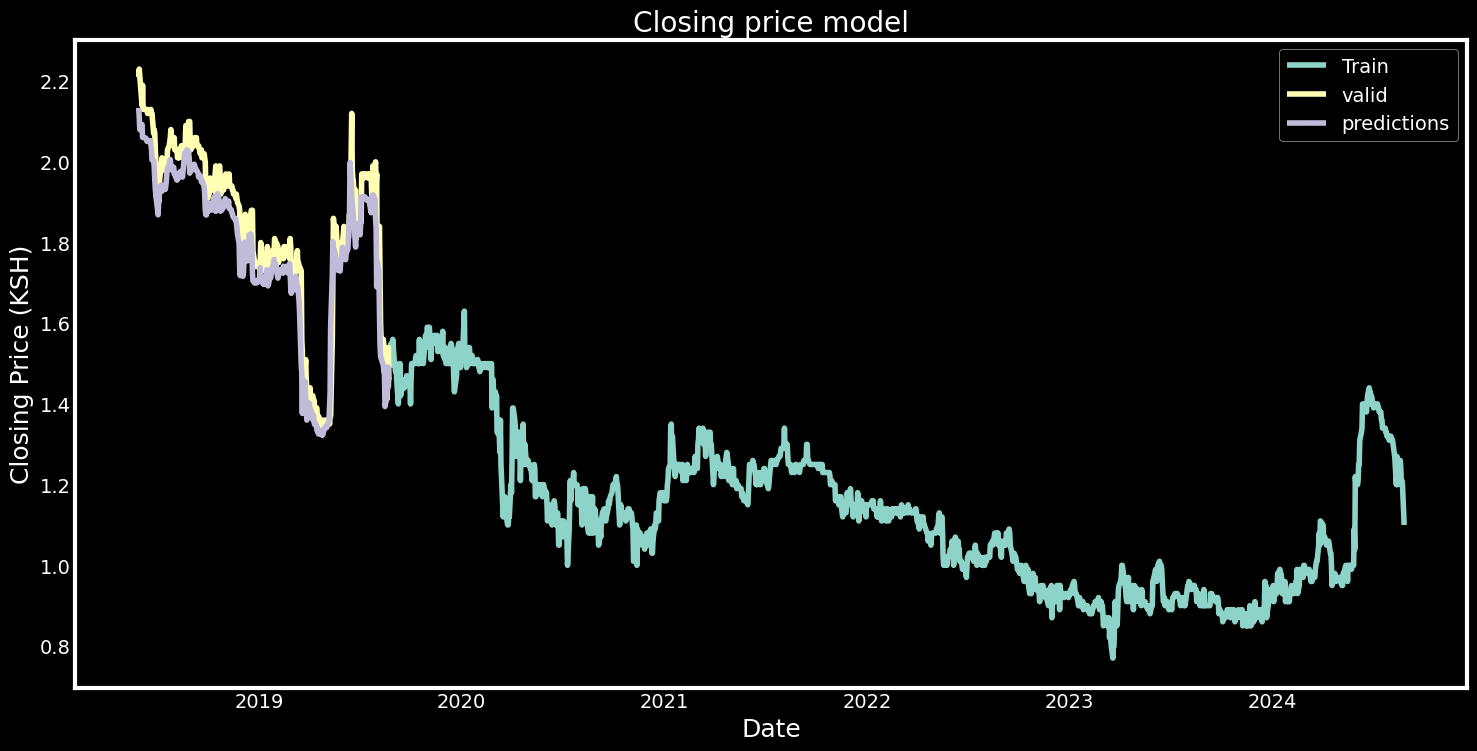

In [130]:
#plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['predictions'] = predictions
plt.figure(figsize = (16,8))
plt.plot(train['Date'],train[' Close'])
plt.plot(valid['Date'],valid[[' Close','predictions']])
plt.legend(['Train','valid','predictions'],loc='upper right')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Closing Price (KSH)',fontsize=18)
plt.title("Closing price model")
plt.grid()
#add a dark background to the chart

plt.show()


In [107]:
valid

,Date,Open,High,Low,Close,Volume,predictions
1247,2019-08-23,1.46,1.55,1.45,1.46,9851000,1.466813
1248,2019-08-22,1.54,1.55,1.50,1.54,71400,1.442546
1249,2019-08-21,1.45,1.56,1.45,1.45,26520600,1.491744
1250,2019-08-20,1.43,1.55,1.40,1.43,28256000,1.432056
1251,2019-08-19,1.41,1.55,1.40,1.41,6923400,1.415758
...,...,...,...,...,...,...,...
1553,2018-06-05,2.19,2.21,2.13,2.19,88800,2.060664
1554,2018-06-04,2.14,2.22,2.08,2.14,16617600,2.092602
1555,2018-05-31,2.21,2.25,2.21,2.21,725600,2.079749
1556,2018-05-30,2.23,2.25,2.21,2.23,105600,2.110057
